# A Transfer Learning and Optimized CNN Based Intrusion Detection System for Internet of Vehicles 
This is the code for the paper entitled "**A Transfer Learning and Optimized CNN Based Intrusion Detection System for Internet of Vehicles**" published in **IEEE International Conference on Communications (IEEE ICC)**, doi=[10.1109/ICC45855.2022.9838780](https://ieeexplore.ieee.org/document/9838780).    
Authors: Li Yang (lyang339@uwo.ca) and Abdallah Shami (Abdallah.Shami@uwo.ca)  
Organization: The Optimized Computing and Communications (OC2) Lab, ECE Department, Western University

**Notebook 1: Data pre-processing**  
Procedures:  
&nbsp; 1): Read the dataset  
&nbsp; 2): Transform the tabular data into images  
&nbsp; 3): Display the transformed images  
&nbsp; 4): Split the training and test set  

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import math
import random
import matplotlib.pyplot as plt
import shutil
from sklearn.preprocessing import QuantileTransformer
from PIL import Image
import warnings
from pickle import load, dump
warnings.filterwarnings("ignore")
print("Done")

Done


## Read the CICIDS2017 dataset
The complete Car-CICIDS2017 dataset is publicly available at:https://github.com/elifnurkarakoc/CICIDS2017  


In [2]:
#Read dataset
# Import libraries
import glob
# Get CSV files list from a folder
# path = "C:/Users/Assaf/Desktop/project/Data/MachineLearningCVE"
path="C:/Users/hadas/Desktop/project/data/CICIDS2017/data25_CICIDS2017.csv"

df=pd.read_csv(path)
# csv_files = glob.glob(path + "/*.csv")

# # Read each CSV file into DataFrame
# # This creates a list of dataframes
# df_list = (pd.read_csv(file) for file in csv_files)
# print(df_list(0))
# # Concatenate all DataFrames
# big_df   = pd.concat(df_list, ignore_index=True)

In [3]:
df

,Unnamed: 0,Average Packet Size,Packet Length Variance,Packet Length Std,Destination Port,Total Length of Bwd Packets,Subflow Bwd Bytes,Bwd Packet Length Mean,Avg Bwd Segment Size,Bwd Packet Length Max,...,Fwd Header Length,Total Backward Packets,Subflow Bwd Packets,Bwd Packet Length Std,Bwd Packet Length Min,Subflow Fwd Packets,Total Fwd Packets,Down/Up Ratio,min_seg_size_forward,Label
0,0,0.000000,0.000000e+00,0.000000,8080.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,32.000000,1.000000,1.000000,0.000000,0.0,1.000000,1.000000,1.0,32.0,Botnet ARES
1,1,39.111111,4.645511e+03,68.157986,8080.0,140.000000,140.000000,35.000000,35.000000,128.000000,...,112.000000,4.000000,4.000000,62.064483,0.0,5.000000,5.000000,0.0,20.0,Botnet ARES
2,2,286.285714,4.238077e+05,651.005157,8080.0,134.000000,134.000000,44.666667,44.666667,128.000000,...,92.000000,3.000000,3.000000,72.231111,0.0,4.000000,4.000000,0.0,20.0,Botnet ARES
3,3,48.714286,5.711696e+03,75.575766,8080.0,134.000000,134.000000,44.666667,44.666667,128.000000,...,92.000000,3.000000,3.000000,72.231111,0.0,4.000000,4.000000,0.0,20.0,Botnet ARES
4,4,48.714286,5.711696e+03,75.575766,8080.0,134.000000,134.000000,44.666667,44.666667,128.000000,...,92.000000,3.000000,3.000000,72.231111,0.0,4.000000,4.000000,0.0,20.0,Botnet ARES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279995,279995,560.467786,1.787456e+06,1336.934277,80.0,12626.247191,12626.247191,1091.192116,1091.192116,7065.648605,...,500.145037,11.548751,11.548751,1990.181964,0.0,15.379532,15.379532,0.0,32.0,Web Attack
279996,279996,563.143746,1.788231e+06,1337.153665,80.0,13095.501809,13095.501809,1098.070947,1098.070947,7206.617043,...,517.786765,11.942364,11.942364,1981.162088,0.0,15.930836,15.930836,0.0,32.0,Web Attack
279997,279997,586.442708,1.789801e+06,1337.004330,80.0,11548.503005,11548.503005,1263.279454,1263.279454,6335.527162,...,491.158303,9.162011,9.162011,2079.097441,0.0,15.098697,15.098697,0.0,32.0,Web Attack
279998,279998,562.428571,1.792558e+06,1338.864430,80.0,13133.000000,13133.000000,1094.416667,1094.416667,7240.000000,...,520.000000,12.000000,12.000000,1985.141601,0.0,16.000000,16.000000,0.0,32.0,Web Attack


In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
df.shape

(280000, 26)

In [6]:
# The labels of the dataset. "R" indicates normal patterns, and there are four types of attack (DoS, fuzzy. gear spoofing, and RPM spoofing zttacks)

df['Label'].value_counts()


Botnet ARES     40000
Brute Force     40000
Dos/DDos        40000
Infiltration    40000
Normal          40000
PortScan        40000
Web Attack      40000
Name: Label, dtype: int64

## Data Transformation
Convert tabular data to images
Procedures:
1. Use quantile transform to transform the original data samples into the scale of [0,255], representing pixel values
2. Generate images for each category (Normal, DoS, Fuzzy, Gear, RPM), each image consists of 27 data samples with 9 features. Thus, the size of each image is 9*9*3, length 9, width 9, and 3 color channels (RGB).

In [7]:
# Transform all features into the scale of [0,1]
numeric_features = df.dtypes[df.dtypes != 'object'].index
scaler = QuantileTransformer() 
df[numeric_features] = scaler.fit_transform(df[numeric_features])
dump(scaler, open('scaler.pkl', 'wb'))

In [14]:
df

,Average Packet Size,Packet Length Variance,Packet Length Std,Destination Port,Total Length of Bwd Packets,Subflow Bwd Bytes,Bwd Packet Length Mean,Avg Bwd Segment Size,Bwd Packet Length Max,Init_Win_bytes_forward,...,Fwd Header Length,Total Backward Packets,Subflow Bwd Packets,Bwd Packet Length Std,Bwd Packet Length Min,Subflow Fwd Packets,Total Fwd Packets,Down/Up Ratio,min_seg_size_forward,Label
0,0.000000,0.000000,0.000000,0.785285,0.000000,0.000000,0.000000,0.000000,0.000000,0.175676,...,0.298298,0.409409,0.408909,0.000000,0.0,0.000000,0.000000,0.722723,0.783283,Botnet ARES
1,0.783784,0.784890,0.785898,0.785285,0.817818,0.815816,0.902903,0.903904,0.905906,0.748248,...,0.784785,0.778278,0.776777,0.906907,0.0,0.792793,0.790791,0.000000,0.000000,Botnet ARES
2,0.985433,0.994060,0.993994,0.785285,0.791291,0.790290,0.932432,0.932933,0.905906,0.748248,...,0.618118,0.727728,0.725726,0.930931,0.0,0.760761,0.759259,0.000000,0.000000,Botnet ARES
3,0.808809,0.810310,0.810811,0.785285,0.791291,0.790290,0.932432,0.932933,0.905906,0.748248,...,0.618118,0.727728,0.725726,0.930931,0.0,0.760761,0.759259,0.000000,0.000000,Botnet ARES
4,0.808809,0.810310,0.810811,0.785285,0.791291,0.790290,0.932432,0.932933,0.905906,0.748248,...,0.618118,0.727728,0.725726,0.930931,0.0,0.760761,0.759259,0.000000,0.000000,Botnet ARES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279995,0.993097,0.996398,0.996497,0.285786,0.971661,0.972146,0.998382,0.998381,0.999854,1.000000,...,0.881478,0.802754,0.801551,0.999770,0.0,0.853942,0.852891,0.000000,0.783283,Web Attack
279996,0.993115,0.996398,0.996497,0.285786,0.972364,0.972767,0.998389,0.998387,0.999878,1.000000,...,0.887621,0.803496,0.802200,0.999763,0.0,0.854624,0.853621,0.000000,0.783283,Web Attack
279997,0.993275,0.996399,0.996497,0.285786,0.970224,0.970470,0.998549,0.998546,0.999731,1.000000,...,0.880003,0.799276,0.798028,0.999834,0.0,0.853173,0.852134,0.000000,0.783283,Web Attack
279998,0.993110,0.996400,0.996499,0.285786,0.972426,0.972817,0.998385,0.998384,0.999884,1.000000,...,0.889890,0.803605,0.802309,0.999766,0.0,0.854709,0.853713,0.000000,0.783283,Web Attack


In [15]:
# Multiply the feature values by 255 to transform them into the scale of [0,255]
df[numeric_features] = df[numeric_features].apply(
    lambda x: (x*255))

In [16]:
df


,Average Packet Size,Packet Length Variance,Packet Length Std,Destination Port,Total Length of Bwd Packets,Subflow Bwd Bytes,Bwd Packet Length Mean,Avg Bwd Segment Size,Bwd Packet Length Max,Init_Win_bytes_forward,...,Fwd Header Length,Total Backward Packets,Subflow Bwd Packets,Bwd Packet Length Std,Bwd Packet Length Min,Subflow Fwd Packets,Total Fwd Packets,Down/Up Ratio,min_seg_size_forward,Label
0,0.000000,0.000000,0.000000,200.247748,0.000000,0.000000,0.000000,0.000000,0.000000,44.797297,...,76.066066,104.399399,104.271772,0.000000,0.0,0.000000,0.000000,184.294294,199.737237,Botnet ARES
1,199.864865,200.147053,200.404089,200.247748,208.543544,208.033033,230.240240,230.495495,231.006006,190.803303,...,200.120120,198.460961,198.078078,231.261261,0.0,202.162162,201.651652,0.000000,0.000000,Botnet ARES
2,251.285513,253.485356,253.468468,200.247748,201.779279,201.524024,237.770270,237.897898,231.006006,190.803303,...,157.620120,185.570571,185.060060,237.387387,0.0,193.993994,193.611111,0.000000,0.000000,Botnet ARES
3,206.246246,206.629129,206.756757,200.247748,201.779279,201.524024,237.770270,237.897898,231.006006,190.803303,...,157.620120,185.570571,185.060060,237.387387,0.0,193.993994,193.611111,0.000000,0.000000,Botnet ARES
4,206.246246,206.629129,206.756757,200.247748,201.779279,201.524024,237.770270,237.897898,231.006006,190.803303,...,157.620120,185.570571,185.060060,237.387387,0.0,193.993994,193.611111,0.000000,0.000000,Botnet ARES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279995,253.239687,254.081440,254.106704,72.875375,247.773518,247.897347,254.587429,254.587030,254.962861,255.000000,...,224.776979,204.702390,204.395619,254.941269,0.0,217.755097,217.487242,0.000000,199.737237,Web Attack
279996,253.244356,254.081507,254.106753,72.875375,247.952708,248.055575,254.589129,254.588721,254.968946,255.000000,...,226.343355,204.891372,204.561053,254.939608,0.0,217.929005,217.673415,0.000000,199.737237,Web Attack
279997,253.285011,254.081642,254.106719,72.875375,247.407182,247.469874,254.629948,254.629328,254.931344,255.000000,...,224.400859,203.815336,203.497257,254.957633,0.0,217.559104,217.294076,0.000000,199.737237,Web Attack
279998,253.243108,254.081879,254.107141,72.875375,247.968548,248.068219,254.588226,254.587823,254.970387,255.000000,...,226.921922,204.919353,204.588857,254.940341,0.0,217.950822,217.696771,0.000000,199.737237,Web Attack


In [17]:
df.describe()

,Average Packet Size,Packet Length Variance,Packet Length Std,Destination Port,Total Length of Bwd Packets,Subflow Bwd Bytes,Bwd Packet Length Mean,Avg Bwd Segment Size,Bwd Packet Length Max,Init_Win_bytes_forward,...,Fwd Header Length.1,Fwd Header Length,Total Backward Packets,Subflow Bwd Packets,Bwd Packet Length Std,Bwd Packet Length Min,Subflow Fwd Packets,Total Fwd Packets,Down/Up Ratio,min_seg_size_forward
count,280000.000000,280000.000000,280000.000000,280000.000000,280000.000000,280000.000000,280000.000000,280000.000000,280000.000000,280000.000000,...,280000.000000,280000.000000,280000.000000,280000.000000,280000.000000,280000.000000,280000.000000,280000.000000,280000.000000,280000.000000
mean,114.069552,101.376015,101.338599,126.621854,105.055150,104.990235,105.006215,104.930550,105.172141,132.772216,...,125.471221,125.875496,124.205000,124.050023,43.043208,86.265204,113.834166,113.584442,106.225819,110.040442
std,88.761730,97.138206,97.094500,73.950616,94.844342,94.780005,93.619501,93.594579,93.757551,80.962608,...,76.096469,76.182015,74.475987,74.403684,90.228811,99.744534,89.082401,88.951400,90.466175,89.567730
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,72.875375,0.000000,0.000000,0.000000,0.000000,0.000000,66.621622,...,48.881381,49.264264,104.399399,104.271772,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,115.120120,135.795796,136.051051,127.372372,140.135135,140.135135,160.810811,160.555556,159.662162,141.028529,...,124.181682,124.692192,104.399399,104.271772,0.000000,0.000000,113.460961,112.950450,184.294294,114.354354
75%,191.159077,191.835422,192.015791,200.247748,191.548419,191.348609,160.810811,160.555556,159.662162,190.803303,...,183.528529,184.166667,185.570571,185.060060,0.000000,206.501502,193.993994,193.611111,184.294294,199.737237
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


All features are in the same scale of [0,255]

### Generate images for each class

In [18]:
df0=df[df['Label']=='Normal'].drop(['Label'],axis=1)
df1=df[df['Label']=='Dos/DDos'].drop(['Label'],axis=1)
df2=df[df['Label']=='PortScan'].drop(['Label'],axis=1)
df3=df[df['Label']=='Botnet ARES'].drop(['Label'],axis=1)
df4=df[df['Label']=='Infiltration'].drop(['Label'],axis=1)
df5=df[df['Label']=='Web Attack'].drop(['Label'],axis=1)
df6=df[df['Label']=='Brute Force'].drop(['Label'],axis=1)



In [19]:
df6

,Average Packet Size,Packet Length Variance,Packet Length Std,Destination Port,Total Length of Bwd Packets,Subflow Bwd Bytes,Bwd Packet Length Mean,Avg Bwd Segment Size,Bwd Packet Length Max,Init_Win_bytes_forward,...,Fwd Header Length.1,Fwd Header Length,Total Backward Packets,Subflow Bwd Packets,Bwd Packet Length Std,Bwd Packet Length Min,Subflow Fwd Packets,Total Fwd Packets,Down/Up Ratio,min_seg_size_forward
40000,0.000000,0.000000,0.000000,28.716216,0.000000,0.000000,0.000000,0.000000,0.000000,101.463964,...,75.683183,76.066066,104.399399,104.271772,0.000000,0.0,0.000000,0.000000,184.294294,199.737237
40001,0.000000,0.000000,0.000000,28.716216,0.000000,0.000000,0.000000,0.000000,0.000000,101.463964,...,75.683183,76.066066,104.399399,104.271772,0.000000,0.0,0.000000,0.000000,184.294294,199.737237
40002,0.000000,0.000000,0.000000,28.716216,0.000000,0.000000,0.000000,0.000000,0.000000,101.463964,...,75.683183,76.066066,104.399399,104.271772,0.000000,0.0,0.000000,0.000000,184.294294,199.737237
40003,0.000000,0.000000,0.000000,28.716216,0.000000,0.000000,0.000000,0.000000,0.000000,101.463964,...,75.683183,76.066066,104.399399,104.271772,0.000000,0.0,0.000000,0.000000,184.294294,199.737237
40004,0.000000,0.000000,0.000000,28.716216,0.000000,0.000000,0.000000,0.000000,0.000000,101.463964,...,75.683183,76.066066,104.399399,104.271772,0.000000,0.0,0.000000,0.000000,184.294294,199.737237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,223.033502,225.983085,225.557178,28.716216,235.002964,235.075706,252.804363,252.888572,249.129129,255.000000,...,227.835672,228.139313,218.873302,218.682330,253.130231,0.0,218.670087,218.392505,184.294294,199.737237
79996,223.293996,226.058983,225.640562,28.716216,235.002964,235.075706,252.804363,252.888572,249.129129,255.000000,...,227.460703,227.788640,218.873302,218.682330,253.130231,0.0,218.381773,218.120398,184.294294,199.737237
79997,223.293996,226.058983,225.640562,28.716216,235.002964,235.075706,252.804363,252.888572,249.129129,255.000000,...,227.460703,227.788640,218.873302,218.682330,253.130231,0.0,218.381773,218.120398,184.294294,199.737237
79998,223.268670,226.051528,225.632372,28.716216,235.002964,235.075706,252.804363,252.888572,249.129129,255.000000,...,227.497728,227.827063,218.873302,218.682330,253.130231,0.0,218.410751,218.148294,184.294294,199.737237


In [20]:
# Generate 12*11 images for each class.

dic_class = {"train_CICIDS2017/0/":df0,"train_CICIDS2017/1/":df1,"train_CICIDS2017/2/":df2,"train_CICIDS2017/3/":df3, "train_CICIDS2017/4/":df4,"train_CICIDS2017/5/":df5, "train_CICIDS2017/6/":df6}

for k in dic_class.keys():
    ims = []
    image_path = k
    os.makedirs(image_path)
    for i in range(0, len(dic_class[k])):
        ims=dic_class[k].iloc[i].values
        ims=np.array(ims).reshape(5,5,1)
        array = np.array(ims, dtype=np.uint8)
        array = np.squeeze(array, axis=2)
        new_image = Image.fromarray(array)
        new_image.save(image_path+str(i)+'.png')

### Display samples for each category

In [114]:
# Read the images for each category, the file name may vary (27.png, 83.png...)
img1 = Image.open('./train_224/0/27.png')
img2 = Image.open('./train_224/1/83.png')
img3 = Image.open('./train_224/2/27.png')
img4 = Image.open('./train_224/3/27.png')
img5 = Image.open('./train_224/4/27.png')
img6 = Image.open('./train_224/5/27.png')
img7 = Image.open('./train_224/6/27.png')

plt.figure(figsize=(10, 10)) 
plt.subplot(1,5,1)
plt.imshow(img1)
plt.title("Normal")
plt.subplot(1,5,2)
plt.imshow(img2)
plt.title('Dos/DDos')
plt.subplot(1,5,3)
plt.imshow(img3)
plt.title('PortScan')
plt.subplot(1,5,4)
plt.imshow(img4)
plt.title('Botnet ARES')
plt.subplot(1,5,5)
plt.imshow(img5)
plt.title('Infiltration')
plt.subplot(1,5,6)
plt.imshow(img6)
plt.title('Web Attack')
plt.subplot(1,5,7)
plt.imshow(img7)
plt.title('Brute Force')
plt.show()  # display it


FileNotFoundError: [Errno 2] No such file or directory: './train_224/0/27.png'

## Split the training and test set 

In [22]:
# Create folders to store images
Train_Dir='./train_CICIDS2017/'
Val_Dir='./test_CICIDS2017/'
allimgs=[]
for subdir in os.listdir(Train_Dir):
    for filename in os.listdir(os.path.join(Train_Dir,subdir)):
        filepath=os.path.join(Train_Dir,subdir,filename)
        allimgs.append(filepath)
print(len(allimgs)) # Print the total number of images

280000


In [23]:
#split a test set from the dataset, train/test size = 80%/20%
Numbers=len(allimgs)//5 	#size of test set (20%)

def mymovefile(srcfile,dstfile):
    if not os.path.isfile(srcfile):
        print ("%s not exist!"%(srcfile))
    else:
        fpath,fname=os.path.split(dstfile)    
        if not os.path.exists(fpath):
            os.makedirs(fpath)               
        shutil.move(srcfile,dstfile)          
        #print ("move %s -> %s"%(srcfile,dstfile))

In [24]:
# The size of test set
Numbers

56000

In [25]:
# Create the test set
val_imgs=random.sample(allimgs,Numbers)
for img in val_imgs:
    dest_path=img.replace(Train_Dir,Val_Dir)
    mymovefile(img,dest_path)
print('Finish creating test set')

Finish creating test set


In [26]:
#resize the images 224*224 for better CNN training
def get_224(folder,dstdir):
    imgfilepaths=[]
    for root,dirs,imgs in os.walk(folder):
        for thisimg in imgs:
            thisimg_path=os.path.join(root,thisimg)
            imgfilepaths.append(thisimg_path)
    for thisimg_path in imgfilepaths:
        dir_name,filename=os.path.split(thisimg_path)
        dir_name=dir_name.replace(folder,dstdir)
        new_file_path=os.path.join(dir_name,filename)
        if not os.path.exists(dir_name):
            os.makedirs(dir_name)
        img=cv2.imread(thisimg_path)
        img=cv2.resize(img,(224,224))
        cv2.imwrite(new_file_path,img)
    print('Finish resizing'.format(folder=folder))

In [27]:
DATA_DIR_224='./train_224_CICIDS2017/'
get_224(folder='./train_CICIDS2017/',dstdir=DATA_DIR_224)

Finish resizing


In [28]:
DATA_DIR2_224='./test_224_CICIDS2017/'
get_224(folder='./test_CICIDS2017/',dstdir=DATA_DIR2_224)

Finish resizing


### Display samples for each category

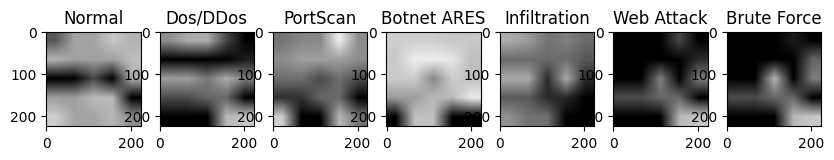

In [29]:
# Read the images for each category, the file name may vary (27.png, 83.png...)
img1 = Image.open('./train_224_CICIDS2017/0/10.png')
img2 = Image.open('./train_224_CICIDS2017/1/83.png')
img3 = Image.open('./train_224_CICIDS2017/2/27.png')
img4 = Image.open('./train_224_CICIDS2017/3/27.png')
img5 = Image.open('./train_224_CICIDS2017/4/10.png')
img6 = Image.open('./train_224_CICIDS2017/5/27.png')
img7 = Image.open('./train_224_CICIDS2017/6/27.png')

plt.figure(figsize=(10, 10)) 
plt.subplot(1,7,1)
plt.imshow(img1)
plt.title("Normal")
plt.subplot(1,7,2)
plt.imshow(img2)
plt.title('Dos/DDos')
plt.subplot(1,7,3)
plt.imshow(img3)
plt.title('PortScan')
plt.subplot(1,7,4)
plt.imshow(img4)
plt.title('Botnet ARES')
plt.subplot(1,7,5)
plt.imshow(img5)
plt.title('Infiltration')
plt.subplot(1,7,6)
plt.imshow(img6)
plt.title('Web Attack')
plt.subplot(1,7,7)
plt.imshow(img7)
plt.title('Brute Force')
plt.show()  # display it